In [5]:
import pandas as pd

In [6]:
# Try reading the CSV file with a different encoding, like 'latin-1'
df = pd.read_csv("spam.csv", encoding='latin-1')

In [7]:
print(df.sample(5))

       v1                                                 v2 Unnamed: 2  \
47    ham                    Fair enough, anything going on?        NaN   
3767  ham                             Where are you call me.        NaN   
2306  ham                         Aight that'll work, thanks        NaN   
646   ham  Do you mind if I ask what happened? You dont h...        NaN   
940   ham  No we sell it all so we'll have tons if coins....        NaN   

     Unnamed: 3 Unnamed: 4  
47          NaN        NaN  
3767        NaN        NaN  
2306        NaN        NaN  
646         NaN        NaN  
940         NaN        NaN  


In [8]:
df.shape

(5572, 5)

In [9]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment

# Data Cleaning

In [10]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
df.sample(5)

,v1,v2
4882,ham,"New Theory: Argument wins d SITUATION, but los..."
2404,ham,Please give it 2 or i will pick it up on Tues...
1852,spam,This is the 2nd time we have tried 2 contact u...
3864,ham,"THATåÕS ALRITE GIRL, U KNOW GAIL IS NEVA WRONG..."
1699,ham,Ok...


In [12]:
# renaming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [13]:
df.sample(5)

,target,text
121,ham,here is my new address -apples&pairs&all that ...
3086,ham,So i asked how's anthony. Dad. And your bf
4108,ham,I want to lick your pussy now...
4174,ham,How are you doing. How's the queen. Are you go...
5262,ham,Did you see that film:)


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [15]:
df["target"] = encoder.fit_transform(df['target'])

In [16]:
# ham -> 0
# spam -> 1

df.sample(5)

,target,text
5210,0,Dai i downloaded but there is only exe file wh...
5171,0,Oh k. . I will come tomorrow
661,0,Then mum's repent how?
736,0,Thanks for looking out for me. I really apprec...
639,0,I had askd u a question some hours before. Its...


In [17]:
# is there any missing values
df.isnull().sum()

,0
target,0
text,0


In [18]:
df.duplicated().sum()

403

In [19]:
# remove dunplicates
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

# EDA

In [21]:
df["target"].value_counts()

,count
target,
0,4516
1,653


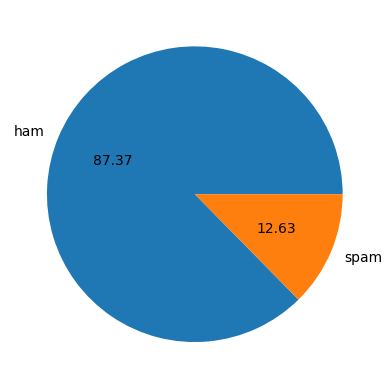

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [23]:
# data is imbalanced

In [24]:
!pip install nltk

In [25]:
import nltk

In [26]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [28]:
df["num_char"] = df["text"].apply(len)

In [29]:
df.sample(5)

,target,text,num_char
178,0,Text her. If she doesnt reply let me know so i...,66
4884,0,Poor girl can't go one day lmao,31
3781,0,How r Ì_ going to send it to me?,32
1981,0,"Sorry, I'll call later in meeting any thing re...",89
2671,0,"That's cool, I'll come by like &lt;#&gt; ish",45


In [30]:
df["num_word"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df["num_sentence"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [33]:
df.head()

,target,text,num_char,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[["num_char", "num_word", "num_sentence"]].describe()

,num_char,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
#ham
df[df["target"] == 0][["num_char", "num_word", "num_sentence"]].describe()

,num_char,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
#spam
df[df["target"] == 1][["num_char", "num_word", "num_sentence"]].describe()

,num_char,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

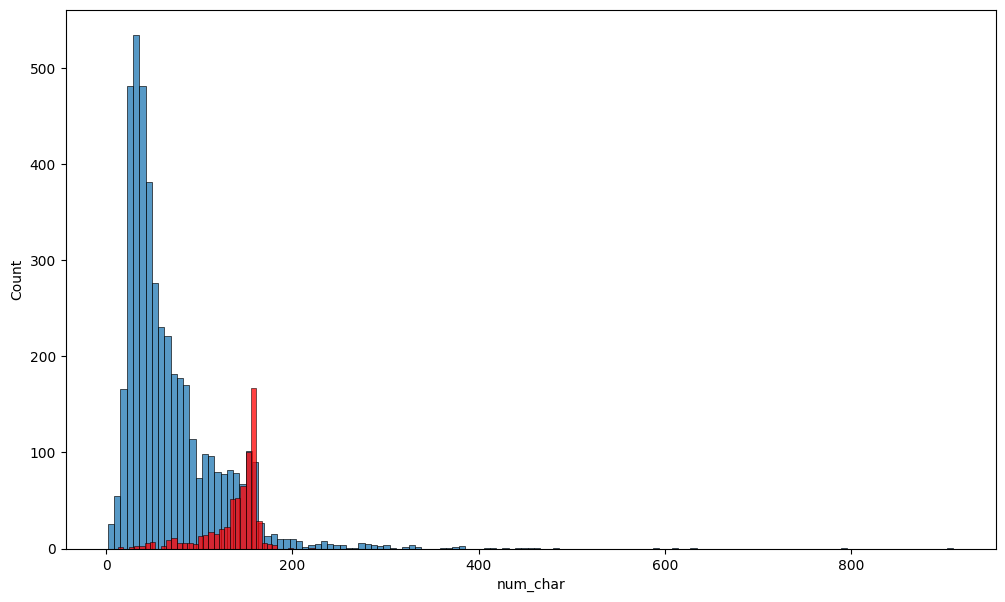

In [38]:
plt.figure(figsize=(12, 7))
sns.histplot(df[df["target"] == 0]["num_char"])
sns.histplot(df[df["target"] == 1]["num_char"], color="red")

so we can see generaly the spam message are larger in length as compared to ham messages

<Axes: xlabel='num_word', ylabel='Count'>

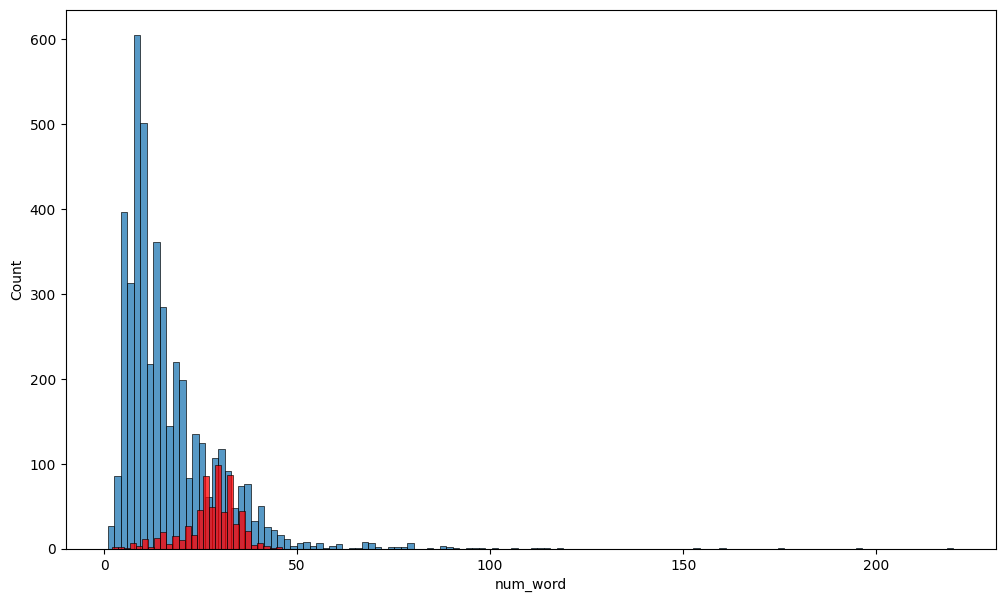

In [39]:
plt.figure(figsize=(12, 7))
sns.histplot(df[df["target"] == 0]["num_word"])
sns.histplot(df[df["target"] == 1]["num_word"], color="red")

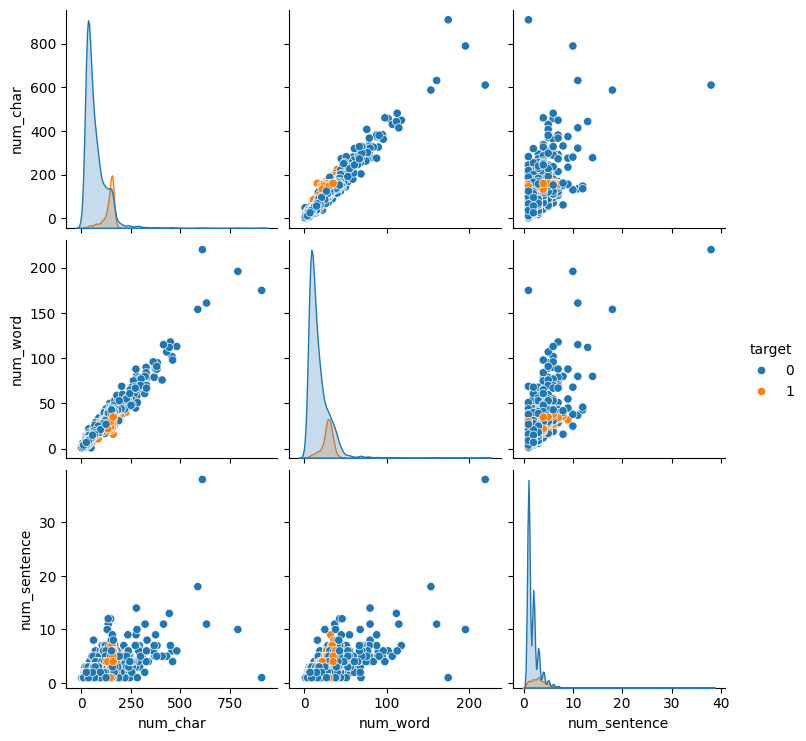

In [40]:
sns.pairplot(df, hue="target")

<Axes: >

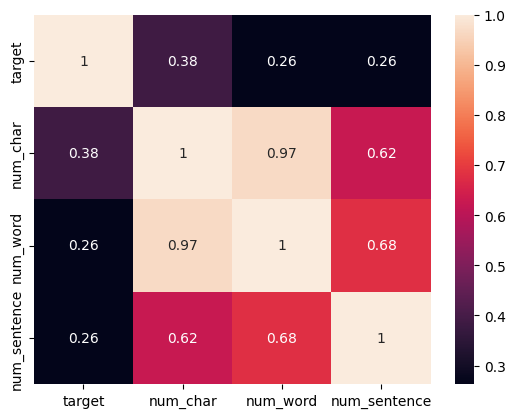

In [41]:
# correlation coefficient
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True)

so in these figure we can conclude that there is strong correlation between sentences words and characters so we can keep one of the attribute from them

# Data preprocessing (Text preprocessing)
* Lower Case
* Tokenization
* Removing special characters
* Removing stop words
* Stemming

In [42]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("dancing")

'danc'

In [44]:
import string
def transform_text(text):
  text = text.lower();
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stop_words and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [45]:
df["transform_text"] = df["text"].apply(lambda x : transform_text(x))

In [46]:
df.head()

,target,text,num_char,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [48]:
# for spam messages most used words
spam_wc = wc.generate(df[df["target"] == 1]["transform_text"].str.cat(sep=" "))

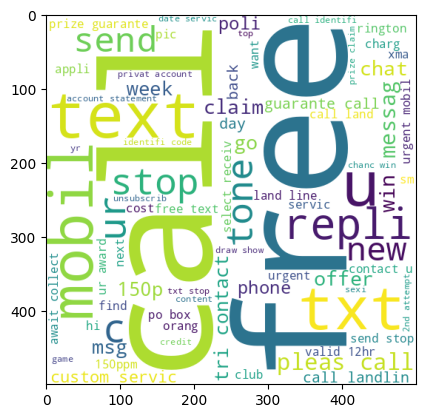

In [49]:
plt.imshow(spam_wc)

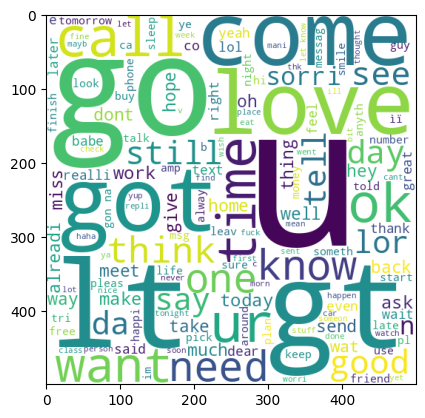

In [50]:
ham_wc = wc.generate(df[df["target"] == 0]["transform_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

find top 30 words used in spam and ham messages

In [51]:
spam_messages = df[df["target"] == 1]["transform_text"].tolist()

In [52]:
spam_corpus = []
for msg in spam_messages:
  for word in msg.split():
    spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

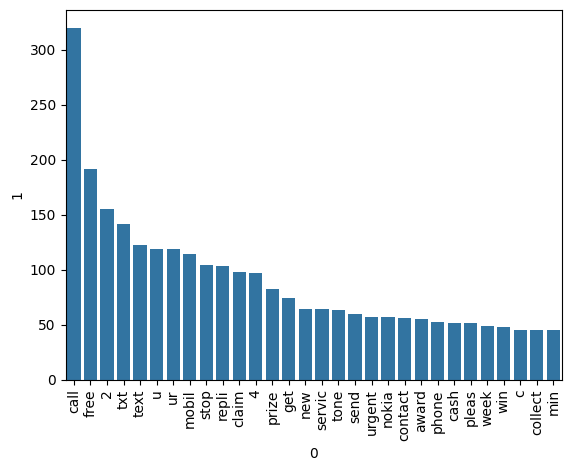

In [54]:
from collections import Counter
most_common_spam = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=most_common_spam[0], y=most_common_spam[1])
plt.xticks(rotation = "vertical")
plt.show()

In [55]:
ham_messages = df[df["target"] == 0]["transform_text"].tolist()
ham_corpus = []
for msg in ham_messages:
  for word in msg.split():
    ham_corpus.append(word)

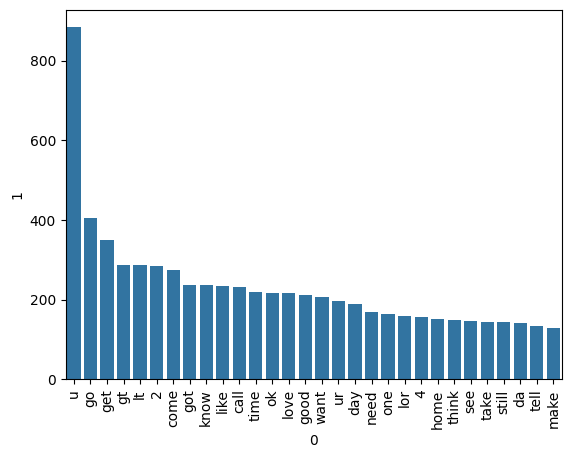

In [56]:
from collections import Counter
most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=most_common_ham[0], y=most_common_ham[1])
plt.xticks(rotation = "vertical")
plt.show()

# Model Building

# play with max_feature

In [102]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [103]:
X = tfidf.fit_transform(df["transform_text"]).toarray()

# perform scaling

In [104]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [105]:
Y = df["target"].values

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [108]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [109]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("GaussianNB accuracy", accuracy_score(y_test, y_pred1)*100, "%")
print("GaussianNB confusion matrix", confusion_matrix(y_test, y_pred1))
print("GaussianNB precision", precision_score(y_test, y_pred1), "%")

GaussianNB accuracy 86.94390715667312 %
GaussianNB confusion matrix [[788 108]
 [ 27 111]]
GaussianNB precision 0.5068493150684932 %


In [110]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print("GaussianNB accuracy", accuracy_score(y_test, y_pred1)*100, "%")
print("GaussianNB confusion matrix", confusion_matrix(y_test, y_pred1))
print("GaussianNB precision", precision_score(y_test, y_pred1)*100, "%")

GaussianNB accuracy 97.09864603481626 %
GaussianNB confusion matrix [[896   0]
 [ 30 108]]
GaussianNB precision 100.0 %


In [111]:
bnb.fit(X_train, y_train)
y_pred1 = bnb.predict(X_test)
print("GaussianNB accuracy", accuracy_score(y_test, y_pred1)*100, "%")
print("GaussianNB confusion matrix", confusion_matrix(y_test, y_pred1))
print("GaussianNB precision", precision_score(y_test, y_pred1) * 100, "%")

GaussianNB accuracy 98.35589941972921 %
GaussianNB confusion matrix [[895   1]
 [ 16 122]]
GaussianNB precision 99.1869918699187 %


In [112]:
# tfidf -> mnb

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [114]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [115]:
performance_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision"])

In [116]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [117]:
def train_model(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  return (accuracy_score(y_test, y_pred)*100, precision_score(y_test, y_pred)*100)

In [118]:
accuracy_list = []
precision_list = []
for clf in clfs:
  print(f"Training model for {clf}")
  accuracy, precision = train_model(clfs[clf], X_train, X_test, y_train, y_test)
  accuracy_list.append(accuracy)
  precision_list.append(precision)

Training model for SVC
Training model for KN
Training model for NB
Training model for DT
Training model for LR
Training model for RF
Training model for AdaBoost
Training model for BgC
Training model for ETC
Training model for GBDT
Training model for xgb


In [120]:
performance_df = pd.concat([performance_df, pd.DataFrame({ "Accuracy_without_scaling": accuracy_list, "Precision_without_Scaling": precision_list})], ignore_index=True)

In [121]:
print(performance_df)

   Model Accuracy Precision  Accuracy_without_scaling  \
0    NaN      NaN       NaN                 97.582205   
1    NaN      NaN       NaN                 90.522244   
2    NaN      NaN       NaN                 97.098646   
3    NaN      NaN       NaN                 93.036750   
4    NaN      NaN       NaN                 95.841393   
5    NaN      NaN       NaN                 97.582205   
6    NaN      NaN       NaN                 92.456480   
7    NaN      NaN       NaN                 95.841393   
8    NaN      NaN       NaN                 97.485493   
9    NaN      NaN       NaN                 94.680851   
10   NaN      NaN       NaN                 96.711799   

    Precision_without_Scaling  
0                   97.478992  
1                  100.000000  
2                  100.000000  
3                   81.730769  
4                   97.029703  
5                   98.290598  
6                   84.883721  
7                   86.821705  
8                   97.4576

In [ ]:
# -> still nb
# model improvement
# 1. change the max_feature in tfidf
# 2.

In [122]:
mnb.fit(X_train, y_train)
y_pred1 = mnb.predict(X_test)
print("GaussianNB accuracy", accuracy_score(y_test, y_pred1)*100, "%")
print("GaussianNB confusion matrix", confusion_matrix(y_test, y_pred1))
print("GaussianNB precision", precision_score(y_test, y_pred1)*100, "%")

GaussianNB accuracy 97.09864603481626 %
GaussianNB confusion matrix [[896   0]
 [ 30 108]]
GaussianNB precision 100.0 %


In [123]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))